In [1]:
!pip install python-binance

In [2]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='',
    API_SECRET=''
)

In [4]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
]

In [5]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [6]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['LINKUSDT', 'NEOUSDT']


In [7]:
_LIMIT_ = 1000
_SYMBOL_ = 'NEOUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [8]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

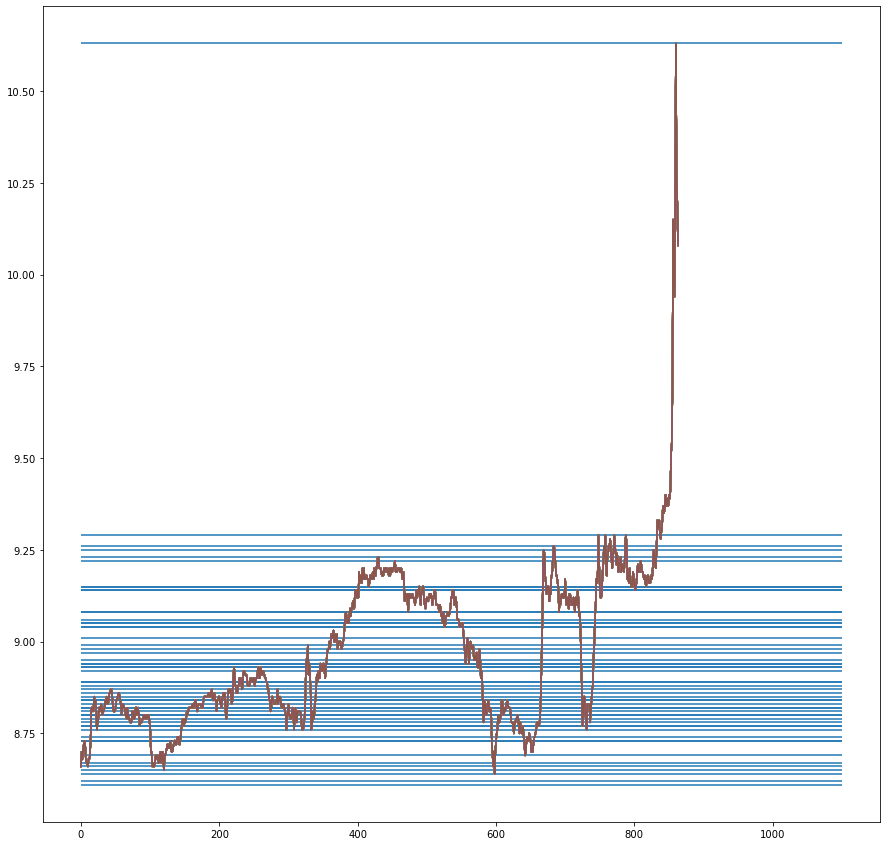

In [9]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()

In [10]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
#print(counter_max_min)
print(close_max_min)

[10.63, 9.29, 9.29, 9.26, 9.25, 8.98, 9.14, 9.15, 9.22, 9.23, 9.08, 8.99, 8.93, 8.93, 8.87, 8.8, 8.86, 8.87, 8.73, 8.84, 8.77, 8.92, 8.8, 9.06, 9.05, 8.83, 8.82, 8.98, 9.01, 9.04, 8.95, 8.88, 8.89, 8.97, 8.88, 8.94, 9.15, 9.14, 8.76, 9.08, 8.69, 8.64, 8.93, 9.04, 9.08, 9.05, 8.79, 8.76, 8.81, 8.79, 8.74, 8.65, 8.77, 8.66, 8.61, 8.67, 8.62, 8.76, 8.62, 8.78, 8.61, 8.77, 8.73, 8.78, 8.94, 8.89, 8.85, 8.82, 8.78, 8.84, 8.82, 8.8]


In [11]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный'])
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный


In [12]:
def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

In [16]:
i=0
profit=0
start_sum=1000
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        
        if float(last_price['lastPrice']) == nearest_close_max and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_close_min and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)
            set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)
            set(asks).remove(nearest_asks)

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Заработали: 115.44
Правильных ответов: 469 Неправильных ответов: 502
Конечеая сумма: 815.44 Кол-во торгуемых лотов: 92.45351473922902
Заработали: 115.44
Правильных ответов: 469 Неправильных ответов: 502
Конечеая сумма: 815.44 Кол-во торгуемых лотов: 92.45351473922902
Работаем на отскок buy bids 8.81000000
Закрылись по тейку sell bids 8.86000000
Заработали: 119.80297053148684
Правильных ответов: 470 Неправильных ответов: 502
Конечеая сумма: 819.802970531487 Кол-во торгуемых лотов: 92.52855197872314
Заработали: 119.80297053148684
Правильных ответов: 470 Неправильных ответов: 502
Конечеая сумма: 819.802970531487 Кол-во торгуемых лотов: 92.52855197872314
Работаем на отскок buy bids 8.85000000
Закрылись по стопу sell bids 8.84000000
Заработали: 118.61117339451451
Правильных ответов: 470 Неправильных ответов: 503
Конечеая сумма: 818.6111733945146 Кол-во торгуемых лотов: 92.60307391340663
Заработали: 118.61117339451451
Правильных ответов: 470 Неправильных ответов: 503
Конечеая сумма: 818.6111

Заработали: 120.19621182270667
Правильных ответов: 471 Неправильных ответов: 503
Конечеая сумма: 820.1962118227068 Кол-во торгуемых лотов: 92.88745320755456
Заработали: 120.19621182270667
Правильных ответов: 471 Неправильных ответов: 503
Конечеая сумма: 820.1962118227068 Кол-во торгуемых лотов: 92.88745320755456
Заработали: 120.19621182270667
Правильных ответов: 471 Неправильных ответов: 503
Конечеая сумма: 820.1962118227068 Кол-во торгуемых лотов: 92.88745320755456
Заработали: 120.19621182270667
Правильных ответов: 471 Неправильных ответов: 503
Конечеая сумма: 820.1962118227068 Кол-во торгуемых лотов: 92.88745320755456
Заработали: 120.19621182270667
Правильных ответов: 471 Неправильных ответов: 503
Конечеая сумма: 820.1962118227068 Кол-во торгуемых лотов: 92.88745320755456
Работаем на отскок buy asks 8.83000000
Закрылись по тейку sell asks 8.81000000
Заработали: 121.78851826957562
Правильных ответов: 472 Неправильных ответов: 503
Конечеая сумма: 821.7885182695758 Кол-во торгуемых лото

Заработали: 125.39157872817464
Правильных ответов: 475 Неправильных ответов: 504
Конечеая сумма: 825.3915787281747 Кол-во торгуемых лотов: 93.90120349581056
Заработали: 125.39157872817464
Правильных ответов: 475 Неправильных ответов: 504
Конечеая сумма: 825.3915787281747 Кол-во торгуемых лотов: 93.90120349581056
Заработали: 125.39157872817464
Правильных ответов: 475 Неправильных ответов: 504
Конечеая сумма: 825.3915787281747 Кол-во торгуемых лотов: 93.90120349581056
Заработали: 125.39157872817464
Правильных ответов: 475 Неправильных ответов: 504
Конечеая сумма: 825.3915787281747 Кол-во торгуемых лотов: 93.90120349581056
Заработали: 125.39157872817464
Правильных ответов: 475 Неправильных ответов: 504
Конечеая сумма: 825.3915787281747 Кол-во торгуемых лотов: 93.90120349581056
Заработали: 125.39157872817464
Правильных ответов: 475 Неправильных ответов: 504
Конечеая сумма: 825.3915787281747 Кол-во торгуемых лотов: 93.90120349581056
Заработали: 125.39157872817464
Правильных ответов: 475 Неп

Заработали: 124.18422262512635
Правильных ответов: 475 Неправильных ответов: 505
Конечеая сумма: 824.1842226251265 Кол-во торгуемых лотов: 93.97767646808741
Заработали: 124.18422262512635
Правильных ответов: 475 Неправильных ответов: 505
Конечеая сумма: 824.1842226251265 Кол-во торгуемых лотов: 93.97767646808741
Заработали: 124.18422262512635
Правильных ответов: 475 Неправильных ответов: 505
Конечеая сумма: 824.1842226251265 Кол-во торгуемых лотов: 93.97767646808741
Работаем на отскок buy asks 8.78000000
Закрылись по стопу sell asks 8.79000000
Заработали: 122.97832846265733
Правильных ответов: 475 Неправильных ответов: 506
Конечеая сумма: 822.9783284626575 Кол-во торгуемых лотов: 93.87064039010554
Заработали: 122.97832846265733
Правильных ответов: 475 Неправильных ответов: 506
Конечеая сумма: 822.9783284626575 Кол-во торгуемых лотов: 93.62665852817493
Заработали: 122.97832846265733
Правильных ответов: 475 Неправильных ответов: 506
Конечеая сумма: 822.9783284626575 Кол-во торгуемых лото

Заработали: 123.78192153614764
Правильных ответов: 477 Неправильных ответов: 508
Конечеая сумма: 823.7819215361478 Кол-во торгуемых лотов: 93.71807981071079
Заработали: 123.78192153614764
Правильных ответов: 477 Неправильных ответов: 508
Конечеая сумма: 823.7819215361478 Кол-во торгуемых лотов: 93.71807981071079
Заработали: 123.78192153614764
Правильных ответов: 477 Неправильных ответов: 508
Конечеая сумма: 823.7819215361478 Кол-во торгуемых лотов: 93.71807981071079
Заработали: 123.78192153614764
Правильных ответов: 477 Неправильных ответов: 508
Конечеая сумма: 823.7819215361478 Кол-во торгуемых лотов: 93.71807981071079
Заработали: 123.78192153614764
Правильных ответов: 477 Неправильных ответов: 508
Конечеая сумма: 823.7819215361478 Кол-во торгуемых лотов: 93.71807981071079
Заработали: 123.78192153614764
Правильных ответов: 477 Неправильных ответов: 508
Конечеая сумма: 823.7819215361478 Кол-во торгуемых лотов: 93.71807981071079
Заработали: 123.78192153614764
Правильных ответов: 477 Неп

Закрылись по тейку sell asks 8.81000000
Заработали: 130.99356339786794
Правильных ответов: 486 Неправильных ответов: 514
Конечеая сумма: 830.9935633978682 Кол-во торгуемых лотов: 93.92790726552573
Заработали: 130.99356339786794
Правильных ответов: 486 Неправильных ответов: 514
Конечеая сумма: 830.9935633978682 Кол-во торгуемых лотов: 94.32390049919049
Заработали: 130.99356339786794
Правильных ответов: 486 Неправильных ответов: 514
Конечеая сумма: 830.9935633978682 Кол-во торгуемых лотов: 94.32390049919049
Заработали: 130.99356339786794
Правильных ответов: 486 Неправильных ответов: 514
Конечеая сумма: 830.9935633978682 Кол-во торгуемых лотов: 94.32390049919049
Заработали: 130.99356339786794
Правильных ответов: 486 Неправильных ответов: 514
Конечеая сумма: 830.9935633978682 Кол-во торгуемых лотов: 94.32390049919049
Работаем на отскок buy asks 8.81000000
Закрылись по тейку sell asks 8.79000000
Заработали: 132.61110510274864
Правильных ответов: 487 Неправильных ответов: 514
Конечеая сумма:

Заработали: 131.39503684548876
Правильных ответов: 487 Неправильных ответов: 515
Конечеая сумма: 831.3950368454891 Кол-во торгуемых лотов: 94.26247583282189
Заработали: 131.39503684548876
Правильных ответов: 487 Неправильных ответов: 515
Конечеая сумма: 831.3950368454891 Кол-во торгуемых лотов: 94.26247583282189
Заработали: 131.39503684548876
Правильных ответов: 487 Неправильных ответов: 515
Конечеая сумма: 831.3950368454891 Кол-во торгуемых лотов: 94.26247583282189
Заработали: 131.39503684548876
Правильных ответов: 487 Неправильных ответов: 515
Конечеая сумма: 831.3950368454891 Кол-во торгуемых лотов: 94.26247583282189
Заработали: 131.39503684548876
Правильных ответов: 487 Неправильных ответов: 515
Конечеая сумма: 831.3950368454891 Кол-во торгуемых лотов: 94.26247583282189
Заработали: 131.39503684548876
Правильных ответов: 487 Неправильных ответов: 515
Конечеая сумма: 831.3950368454891 Кол-во торгуемых лотов: 94.26247583282189
Заработали: 131.39503684548876
Правильных ответов: 487 Неп

Заработали: 131.7991529310945
Правильных ответов: 488 Неправильных ответов: 516
Конечеая сумма: 831.7991529310949 Кол-во торгуемых лотов: 94.73794452518166
Заработали: 131.7991529310945
Правильных ответов: 488 Неправильных ответов: 516
Конечеая сумма: 831.7991529310949 Кол-во торгуемых лотов: 94.73794452518166
Заработали: 131.7991529310945
Правильных ответов: 488 Неправильных ответов: 516
Конечеая сумма: 831.7991529310949 Кол-во торгуемых лотов: 94.73794452518166
Заработали: 131.7991529310945
Правильных ответов: 488 Неправильных ответов: 516
Конечеая сумма: 831.7991529310949 Кол-во торгуемых лотов: 94.73794452518166
Заработали: 131.7991529310945
Правильных ответов: 488 Неправильных ответов: 516
Конечеая сумма: 831.7991529310949 Кол-во торгуемых лотов: 94.73794452518166
Заработали: 131.7991529310945
Правильных ответов: 488 Неправильных ответов: 516
Конечеая сумма: 831.7991529310949 Кол-во торгуемых лотов: 94.73794452518166
Заработали: 131.7991529310945
Правильных ответов: 488 Неправильн

Работаем на отскок buy asks 8.78000000
Закрылись по стопу sell asks 8.79000000
Заработали: 129.77397326262437
Правильных ответов: 489 Неправильных ответов: 519
Конечеая сумма: 829.7739732626247 Кол-во торгуемых лотов: 94.64576593980044
Работаем на пробой buy bids 8.79000000
Закрылись по стопу sell bids 8.80000000
Заработали: 128.56097587339147
Правильных ответов: 489 Неправильных ответов: 520
Конечеая сумма: 828.5609758733918 Кол-во торгуемых лотов: 94.15465634924907
Работаем на пробой buy bids 8.80000000
Закрылись по стопу sell bids 8.81000000
Заработали: 127.35082302317274
Правильных ответов: 489 Неправильных ответов: 521
Конечеая сумма: 827.3508230231731 Кол-во торгуемых лотов: 93.91042259059853
Заработали: 127.35082302317274
Правильных ответов: 489 Неправильных ответов: 521
Конечеая сумма: 827.3508230231731 Кол-во торгуемых лотов: 93.91042259059853
Заработали: 127.35082302317274
Правильных ответов: 489 Неправильных ответов: 521
Конечеая сумма: 827.3508230231731 Кол-во торгуемых лот

Работаем на отскок buy bids 8.76000000
Закрылись по стопу sell bids 8.75000000
Заработали: 136.27686549001575
Правильных ответов: 499 Неправильных ответов: 527
Конечеая сумма: 836.2768654900162 Кол-во торгуемых лотов: 95.57449891314471
Работаем на отскок buy bids 8.75000000
Закрылись по стопу sell bids 8.74000000
Заработали: 135.05032162715372
Правильных ответов: 499 Неправильных ответов: 528
Конечеая сумма: 835.0503216271542 Кол-во торгуемых лотов: 95.54351506031512
Заработали: 135.05032162715372
Правильных ответов: 499 Неправильных ответов: 528
Конечеая сумма: 835.0503216271542 Кол-во торгуемых лотов: 95.54351506031512
Заработали: 135.05032162715372
Правильных ответов: 499 Неправильных ответов: 528
Конечеая сумма: 835.0503216271542 Кол-во торгуемых лотов: 95.54351506031512
Заработали: 135.05032162715372
Правильных ответов: 499 Неправильных ответов: 528
Конечеая сумма: 835.0503216271542 Кол-во торгуемых лотов: 95.54351506031512
Работаем на отскок buy asks 8.75000000
Закрылись по стопу

Заработали: 140.78625086160184
Правильных ответов: 504 Неправильных ответов: 530
Конечеая сумма: 840.7862508616023 Кол-во торгуемых лотов: 95.87072415753732
Заработали: 140.78625086160184
Правильных ответов: 504 Неправильных ответов: 530
Конечеая сумма: 840.7862508616023 Кол-во торгуемых лотов: 95.87072415753732
Заработали: 140.78625086160184
Правильных ответов: 504 Неправильных ответов: 530
Конечеая сумма: 840.7862508616023 Кол-во торгуемых лотов: 95.87072415753732
Заработали: 140.78625086160184
Правильных ответов: 504 Неправильных ответов: 530
Конечеая сумма: 840.7862508616023 Кол-во торгуемых лотов: 95.87072415753732
Работаем на пробой buy bids 8.77000000
Закрылись по тейку sell bids 8.75000000
Работаем на отскок buy bids 8.75000000
Закрылись по тейку sell bids 8.77000000
Работаем на отскок buy asks 8.77000000
Закрылись по тейку sell asks 8.75000000
Заработали: 145.73562266248769
Правильных ответов: 507 Неправильных ответов: 530
Конечеая сумма: 845.7356226624883 Кол-во торгуемых лот

Работаем на пробой buy bids 8.78000000
Закрылись по тейку sell bids 8.76000000
Работаем на отскок buy bids 8.76000000
Закрылись по тейку sell bids 8.78000000
Работаем на отскок buy asks 8.78000000
Закрылись по тейку sell asks 8.76000000
Заработали: 147.38388868097942
Правильных ответов: 511 Неправильных ответов: 534
Конечеая сумма: 847.38388868098 Кол-во торгуемых лотов: 96.32472653010466
Заработали: 147.38388868097942
Правильных ответов: 511 Неправильных ответов: 534
Конечеая сумма: 847.38388868098 Кол-во торгуемых лотов: 96.73332062568265
Заработали: 147.38388868097942
Правильных ответов: 511 Неправильных ответов: 534
Конечеая сумма: 847.38388868098 Кол-во торгуемых лотов: 96.73332062568265
Работаем на отскок buy asks 8.77000000
Закрылись по тейку sell asks 8.75000000
Заработали: 149.04210976711508
Правильных ответов: 512 Неправильных ответов: 534
Конечеая сумма: 849.0421097671157 Кол-во торгуемых лотов: 96.62302037411403
Заработали: 149.04210976711508
Правильных ответов: 512 Неправи

Закрылись по тейку sell asks 8.83000000
Заработали: 153.95889561242723
Правильных ответов: 521 Неправильных ответов: 542
Конечеая сумма: 853.9588956124279 Кол-во торгуемых лотов: 96.3060576742476
Работаем на отскок buy bids 8.83000000
Закрылись по стопу sell bids 8.82000000
Заработали: 152.71525873515108
Правильных ответов: 521 Неправильных ответов: 543
Конечеая сумма: 852.7152587351518 Кол-во торгуемых лотов: 96.67973455047073
Работаем на отскок buy asks 8.83000000
Закрылись по тейку sell asks 8.81000000
Заработали: 154.37069676846025
Правильных ответов: 522 Неправильных ответов: 543
Конечеая сумма: 854.370696768461 Кол-во торгуемых лотов: 96.57024447736713
Заработали: 154.37069676846025
Правильных ответов: 522 Неправильных ответов: 543
Конечеая сумма: 854.370696768461 Кол-во торгуемых лотов: 96.97737761276515
Заработали: 154.37069676846025
Правильных ответов: 522 Неправильных ответов: 543
Конечеая сумма: 854.370696768461 Кол-во торгуемых лотов: 96.97737761276515
Заработали: 154.37069

Заработали: 152.70457018472464
Правильных ответов: 524 Неправильных ответов: 547
Конечеая сумма: 852.7045701847253 Кол-во торгуемых лотов: 96.78825995286326
Заработали: 152.70457018472464
Правильных ответов: 524 Неправильных ответов: 547
Конечеая сумма: 852.7045701847253 Кол-во торгуемых лотов: 96.78825995286326
Заработали: 152.70457018472464
Правильных ответов: 524 Неправильных ответов: 547
Конечеая сумма: 852.7045701847253 Кол-во торгуемых лотов: 96.78825995286326
Заработали: 152.70457018472464
Правильных ответов: 524 Неправильных ответов: 547
Конечеая сумма: 852.7045701847253 Кол-во торгуемых лотов: 96.78825995286326
Заработали: 152.70457018472464
Правильных ответов: 524 Неправильных ответов: 547
Конечеая сумма: 852.7045701847253 Кол-во торгуемых лотов: 96.78825995286326
Заработали: 152.70457018472464
Правильных ответов: 524 Неправильных ответов: 547
Конечеая сумма: 852.7045701847253 Кол-во торгуемых лотов: 96.78825995286326
Заработали: 152.70457018472464
Правильных ответов: 524 Неп

Заработали: 151.46677882590018
Правильных ответов: 527 Неправильных ответов: 552
Конечеая сумма: 851.466778825901 Кол-во торгуемых лотов: 96.53818354035158
Заработали: 151.46677882590018
Правильных ответов: 527 Неправильных ответов: 552
Конечеая сумма: 851.466778825901 Кол-во торгуемых лотов: 96.53818354035158
Заработали: 151.46677882590018
Правильных ответов: 527 Неправильных ответов: 552
Конечеая сумма: 851.466778825901 Кол-во торгуемых лотов: 96.53818354035158
Заработали: 151.46677882590018
Правильных ответов: 527 Неправильных ответов: 552
Конечеая сумма: 851.466778825901 Кол-во торгуемых лотов: 96.53818354035158
Заработали: 151.46677882590018
Правильных ответов: 527 Неправильных ответов: 552
Конечеая сумма: 851.466778825901 Кол-во торгуемых лотов: 96.53818354035158
Заработали: 151.46677882590018
Правильных ответов: 527 Неправильных ответов: 552
Конечеая сумма: 851.466778825901 Кол-во торгуемых лотов: 96.53818354035158
Заработали: 151.46677882590018
Правильных ответов: 527 Неправиль

Заработали: 149.3938021115429
Правильных ответов: 528 Неправильных ответов: 555
Конечеая сумма: 849.3938021115438 Кол-во торгуемых лотов: 95.97670080356427
Заработали: 149.3938021115429
Правильных ответов: 528 Неправильных ответов: 555
Конечеая сумма: 849.3938021115438 Кол-во торгуемых лотов: 95.97670080356427
Работаем на отскок buy asks 8.85000000
Закрылись по стопу sell asks 8.86000000
Заработали: 148.1586760293679
Правильных ответов: 528 Неправильных ответов: 556
Конечеая сумма: 848.1586760293687 Кол-во торгуемых лотов: 95.97670080356427
Работаем на отскок buy asks 8.86000000
Закрылись по тейку sell asks 8.84000000
Заработали: 149.7987621843273
Правильных ответов: 529 Неправильных ответов: 556
Конечеая сумма: 849.7987621843281 Кол-во торгуемых лотов: 95.72897020647503
Заработали: 149.7987621843273
Правильных ответов: 529 Неправильных ответов: 556
Конечеая сумма: 849.7987621843281 Кол-во торгуемых лотов: 96.13108169505973
Заработали: 149.7987621843273
Правильных ответов: 529 Неправил

Работаем на отскок buy bids 8.85000000
Закрылись по тейку sell bids 8.87000000
Работаем на отскок buy asks 8.87000000
Закрылись по стопу sell asks 8.88000000
Заработали: 152.666487203395
Правильных ответов: 533 Неправильных ответов: 559
Конечеая сумма: 852.6664872033958 Кол-во торгуемых лотов: 96.26899646757771
Заработали: 152.666487203395
Правильных ответов: 533 Неправильных ответов: 559
Конечеая сумма: 852.6664872033958 Кол-во торгуемых лотов: 96.02100081119322
Заработали: 152.666487203395
Правильных ответов: 533 Неправильных ответов: 559
Конечеая сумма: 852.6664872033958 Кол-во торгуемых лотов: 96.02100081119322
Заработали: 152.666487203395
Правильных ответов: 533 Неправильных ответов: 559
Конечеая сумма: 852.6664872033958 Кол-во торгуемых лотов: 96.02100081119322
Работаем на отскок buy asks 8.88000000
Закрылись по тейку sell asks 8.86000000
Заработали: 154.3109543858077
Правильных ответов: 534 Неправильных ответов: 559
Конечеая сумма: 854.3109543858085 Кол-во торгуемых лотов: 96.02

Заработали: 157.87788956912038
Правильных ответов: 539 Неправильных ответов: 562
Конечеая сумма: 857.8778895691211 Кол-во торгуемых лотов: 96.49920017650405
Заработали: 157.87788956912038
Правильных ответов: 539 Неправильных ответов: 562
Конечеая сумма: 857.8778895691211 Кол-во торгуемых лотов: 96.49920017650405
Заработали: 157.87788956912038
Правильных ответов: 539 Неправильных ответов: 562
Конечеая сумма: 857.8778895691211 Кол-во торгуемых лотов: 96.49920017650405
Заработали: 157.87788956912038
Правильных ответов: 539 Неправильных ответов: 562
Конечеая сумма: 857.8778895691211 Кол-во торгуемых лотов: 96.49920017650405
Заработали: 157.87788956912038
Правильных ответов: 539 Неправильных ответов: 562
Конечеая сумма: 857.8778895691211 Кол-во торгуемых лотов: 96.49920017650405
Заработали: 157.87788956912038
Правильных ответов: 539 Неправильных ответов: 562
Конечеая сумма: 857.8778895691211 Кол-во торгуемых лотов: 96.49920017650405
Заработали: 157.87788956912038
Правильных ответов: 539 Неп

Заработали: 170.93316070827274
Правильных ответов: 550 Неправильных ответов: 567
Конечеая сумма: 870.9331607082734 Кол-во торгуемых лотов: 98.29945380454554
Заработали: 170.93316070827274
Правильных ответов: 550 Неправильных ответов: 567
Конечеая сумма: 870.9331607082734 Кол-во торгуемых лотов: 98.29945380454554
Заработали: 170.93316070827274
Правильных ответов: 550 Неправильных ответов: 567
Конечеая сумма: 870.9331607082734 Кол-во торгуемых лотов: 98.29945380454554
Работаем на отскок buy asks 8.87000000
Закрылись по тейку sell asks 8.85000000
Заработали: 172.615069123798
Правильных ответов: 551 Неправильных ответов: 567
Конечеая сумма: 872.6150691237987 Кол-во торгуемых лотов: 98.18863142145135
Заработали: 172.615069123798
Правильных ответов: 551 Неправильных ответов: 567
Конечеая сумма: 872.6150691237987 Кол-во торгуемых лотов: 98.60057278235014
Заработали: 172.615069123798
Правильных ответов: 551 Неправильных ответов: 567
Конечеая сумма: 872.6150691237987 Кол-во торгуемых лотов: 98.

Заработали: 183.23517735510077
Правильных ответов: 558 Неправильных ответов: 568
Конечеая сумма: 883.2351773551014 Кол-во торгуемых лотов: 99.91348160125582
Заработали: 183.23517735510077
Правильных ответов: 558 Неправильных ответов: 568
Конечеая сумма: 883.2351773551014 Кол-во торгуемых лотов: 99.91348160125582
Заработали: 183.23517735510077
Правильных ответов: 558 Неправильных ответов: 568
Конечеая сумма: 883.2351773551014 Кол-во торгуемых лотов: 99.91348160125582
Заработали: 183.23517735510077
Правильных ответов: 558 Неправильных ответов: 568
Конечеая сумма: 883.2351773551014 Кол-во торгуемых лотов: 99.91348160125582
Заработали: 183.23517735510077
Правильных ответов: 558 Неправильных ответов: 568
Конечеая сумма: 883.2351773551014 Кол-во торгуемых лотов: 99.91348160125582
Заработали: 183.23517735510077
Правильных ответов: 558 Неправильных ответов: 568
Конечеая сумма: 883.2351773551014 Кол-во торгуемых лотов: 99.91348160125582
Заработали: 183.23517735510077
Правильных ответов: 558 Неп

Заработали: 182.37387634842986
Правильных ответов: 559 Неправильных ответов: 570
Конечеая сумма: 882.3738763484305 Кол-во торгуемых лотов: 99.92909131918805
Заработали: 182.37387634842986
Правильных ответов: 559 Неправильных ответов: 570
Конечеая сумма: 882.3738763484305 Кол-во торгуемых лотов: 99.92909131918805
Заработали: 182.37387634842986
Правильных ответов: 559 Неправильных ответов: 570
Конечеая сумма: 882.3738763484305 Кол-во торгуемых лотов: 99.92909131918805
Заработали: 182.37387634842986
Правильных ответов: 559 Неправильных ответов: 570
Конечеая сумма: 882.3738763484305 Кол-во торгуемых лотов: 99.92909131918805
Заработали: 182.37387634842986
Правильных ответов: 559 Неправильных ответов: 570
Конечеая сумма: 882.3738763484305 Кол-во торгуемых лотов: 99.92909131918805
Заработали: 182.37387634842986
Правильных ответов: 559 Неправильных ответов: 570
Конечеая сумма: 882.3738763484305 Кол-во торгуемых лотов: 99.92909131918805
Заработали: 182.37387634842986
Правильных ответов: 559 Неп

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273280>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF2736D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273310>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273640>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273310>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273850>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273280>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF2733A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273880>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273310>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273760>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273460>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273910>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273400>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273850>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273BE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273CD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF2736D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных ответов: 572
Конечеая сумма: 881.51696990852 Кол-во торгуемых лотов: 99.60643727779888
Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных ответов: 572
Конечеая сумма: 881.51696990852 Кол-во торгуемых лотов: 99.60643727779888
Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных ответов: 572
Конечеая сумма: 881.51696990852 Кол-во торгуемых лотов: 99.60643727779888
Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных ответов: 572
Конечеая сумма: 881.51696990852 Кол-во торгуемых лотов: 99.60643727779888
Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных ответов: 572
Конечеая сумма: 881.51696990852 Кол-во торгуемых лотов: 99.60643727779888
Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных ответов: 572
Конечеая сумма: 881.51696990852 Кол-во торгуемых лотов: 99.60643727779888
Заработали: 181.51696990851931
Правильных ответов: 560 Неправильных от

Заработали: 185.78296298671862
Правильных ответов: 564 Неправильных ответов: 574
Конечеая сумма: 885.7829629867191 Кол-во торгуемых лотов: 100.3151713461743
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=NEOUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EBAF273970>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера'))
Заработали: 185.78296298671862
Правильных ответов: 564 Неправильных ответов: 574
Конечеая сумма: 885.7829629867191 Кол-во торгуемых лотов: 100.3151713461743
Заработали: 185.78296298671862
Правильных ответов: 564 Неправильных ответов: 574
Конечеая сумма: 885.7829629867191 Кол-во торгуемых лотов: 100.3151713461743
Заработали: 185.7829629867186

Заработали: 184.91464126664462
Правильных ответов: 565 Неправильных ответов: 576
Конечеая сумма: 884.9146412666452 Кол-во торгуемых лотов: 100.21683366553172
Заработали: 184.91464126664462
Правильных ответов: 565 Неправильных ответов: 576
Конечеая сумма: 884.9146412666452 Кол-во торгуемых лотов: 100.21683366553172
Заработали: 184.91464126664462
Правильных ответов: 565 Неправильных ответов: 576
Конечеая сумма: 884.9146412666452 Кол-во торгуемых лотов: 100.21683366553172
Заработали: 184.91464126664462
Правильных ответов: 565 Неправильных ответов: 576
Конечеая сумма: 884.9146412666452 Кол-во торгуемых лотов: 100.21683366553172
Заработали: 184.91464126664462
Правильных ответов: 565 Неправильных ответов: 576
Конечеая сумма: 884.9146412666452 Кол-во торгуемых лотов: 100.21683366553172
Заработали: 184.91464126664462
Правильных ответов: 565 Неправильных ответов: 576
Конечеая сумма: 884.9146412666452 Кол-во торгуемых лотов: 100.21683366553172
Заработали: 184.91464126664462
Правильных ответов: 5

Заработали: 185.7660218419008
Правильных ответов: 567 Неправильных ответов: 578
Конечеая сумма: 885.7660218419013 Кол-во торгуемых лотов: 100.6552297547615
Заработали: 185.7660218419008
Правильных ответов: 567 Неправильных ответов: 578
Конечеая сумма: 885.7660218419013 Кол-во торгуемых лотов: 100.6552297547615
Заработали: 185.7660218419008
Правильных ответов: 567 Неправильных ответов: 578
Конечеая сумма: 885.7660218419013 Кол-во торгуемых лотов: 100.6552297547615
Заработали: 185.7660218419008
Правильных ответов: 567 Неправильных ответов: 578
Конечеая сумма: 885.7660218419013 Кол-во торгуемых лотов: 100.6552297547615
Заработали: 185.7660218419008
Правильных ответов: 567 Неправильных ответов: 578
Конечеая сумма: 885.7660218419013 Кол-во торгуемых лотов: 100.6552297547615
Заработали: 185.7660218419008
Правильных ответов: 567 Неправильных ответов: 578
Конечеая сумма: 885.7660218419013 Кол-во торгуемых лотов: 100.6552297547615
Заработали: 185.7660218419008
Правильных ответов: 567 Неправильн

Заработали: 184.4723182918042
Правильных ответов: 567 Неправильных ответов: 579
Конечеая сумма: 884.4723182918048 Кол-во торгуемых лотов: 100.39413374481325
Заработали: 184.4723182918042
Правильных ответов: 567 Неправильных ответов: 579
Конечеая сумма: 884.4723182918048 Кол-во торгуемых лотов: 100.39413374481325
Заработали: 184.4723182918042
Правильных ответов: 567 Неправильных ответов: 579
Конечеая сумма: 884.4723182918048 Кол-во торгуемых лотов: 100.39413374481325
Заработали: 184.4723182918042
Правильных ответов: 567 Неправильных ответов: 579
Конечеая сумма: 884.4723182918048 Кол-во торгуемых лотов: 100.39413374481325
Заработали: 184.4723182918042
Правильных ответов: 567 Неправильных ответов: 579
Конечеая сумма: 884.4723182918048 Кол-во торгуемых лотов: 100.39413374481325
Заработали: 184.4723182918042
Правильных ответов: 567 Неправильных ответов: 579
Конечеая сумма: 884.4723182918048 Кол-во торгуемых лотов: 100.39413374481325
Заработали: 184.4723182918042
Правильных ответов: 567 Непр

Заработали: 190.09021497127412
Правильных ответов: 574 Неправильных ответов: 584
Конечеая сумма: 890.0902149712748 Кол-во торгуемых лотов: 101.14661533764486
Заработали: 190.09021497127412
Правильных ответов: 574 Неправильных ответов: 584
Конечеая сумма: 890.0902149712748 Кол-во торгуемых лотов: 101.14661533764486
Заработали: 190.09021497127412
Правильных ответов: 574 Неправильных ответов: 584
Конечеая сумма: 890.0902149712748 Кол-во торгуемых лотов: 101.14661533764486
Заработали: 190.09021497127412
Правильных ответов: 574 Неправильных ответов: 584
Конечеая сумма: 890.0902149712748 Кол-во торгуемых лотов: 101.14661533764486
Заработали: 190.09021497127412
Правильных ответов: 574 Неправильных ответов: 584
Конечеая сумма: 890.0902149712748 Кол-во торгуемых лотов: 101.14661533764486
Заработали: 190.09021497127412
Правильных ответов: 574 Неправильных ответов: 584
Конечеая сумма: 890.0902149712748 Кол-во торгуемых лотов: 101.14661533764486
Заработали: 190.09021497127412
Правильных ответов: 5

Заработали: 188.79052344576374
Правильных ответов: 574 Неправильных ответов: 585
Конечеая сумма: 888.7905234457644 Кол-во торгуемых лотов: 101.11382519291973
Заработали: 188.79052344576374
Правильных ответов: 574 Неправильных ответов: 585
Конечеая сумма: 888.7905234457644 Кол-во торгуемых лотов: 101.11382519291973
Заработали: 188.79052344576374
Правильных ответов: 574 Неправильных ответов: 585
Конечеая сумма: 888.7905234457644 Кол-во торгуемых лотов: 101.11382519291973
Заработали: 188.79052344576374
Правильных ответов: 574 Неправильных ответов: 585
Конечеая сумма: 888.7905234457644 Кол-во торгуемых лотов: 101.11382519291973
Заработали: 188.79052344576374
Правильных ответов: 574 Неправильных ответов: 585
Конечеая сумма: 888.7905234457644 Кол-во торгуемых лотов: 101.11382519291973
Заработали: 188.79052344576374
Правильных ответов: 574 Неправильных ответов: 585
Конечеая сумма: 888.7905234457644 Кол-во торгуемых лотов: 101.11382519291973
Заработали: 188.79052344576374
Правильных ответов: 5

Заработали: 185.32773875132955
Правильных ответов: 575 Неправильных ответов: 589
Конечеая сумма: 885.3277387513302 Кол-во торгуемых лотов: 100.71987926636295
Заработали: 185.32773875132955
Правильных ответов: 575 Неправильных ответов: 589
Конечеая сумма: 885.3277387513302 Кол-во торгуемых лотов: 100.71987926636295
Заработали: 185.32773875132955
Правильных ответов: 575 Неправильных ответов: 589
Конечеая сумма: 885.3277387513302 Кол-во торгуемых лотов: 100.71987926636295
Заработали: 185.32773875132955
Правильных ответов: 575 Неправильных ответов: 589
Конечеая сумма: 885.3277387513302 Кол-во торгуемых лотов: 100.71987926636295
Заработали: 185.32773875132955
Правильных ответов: 575 Неправильных ответов: 589
Конечеая сумма: 885.3277387513302 Кол-во торгуемых лотов: 100.71987926636295
Заработали: 185.32773875132955
Правильных ответов: 575 Неправильных ответов: 589
Конечеая сумма: 885.3277387513302 Кол-во торгуемых лотов: 100.71987926636295
Заработали: 185.32773875132955
Правильных ответов: 5

Заработали: 181.87465658069488
Правильных ответов: 576 Неправильных ответов: 593
Конечеая сумма: 881.8746565806956 Кол-во торгуемых лотов: 100.09927997510732
Заработали: 181.87465658069488
Правильных ответов: 576 Неправильных ответов: 593
Конечеая сумма: 881.8746565806956 Кол-во торгуемых лотов: 100.09927997510732
Заработали: 181.87465658069488
Правильных ответов: 576 Неправильных ответов: 593
Конечеая сумма: 881.8746565806956 Кол-во торгуемых лотов: 100.09927997510732
Заработали: 181.87465658069488
Правильных ответов: 576 Неправильных ответов: 593
Конечеая сумма: 881.8746565806956 Кол-во торгуемых лотов: 100.09927997510732
Заработали: 181.87465658069488
Правильных ответов: 576 Неправильных ответов: 593
Конечеая сумма: 881.8746565806956 Кол-во торгуемых лотов: 100.21302915689722
Заработали: 181.87465658069488
Правильных ответов: 576 Неправильных ответов: 593
Конечеая сумма: 881.8746565806956 Кол-во торгуемых лотов: 100.21302915689722
Заработали: 181.87465658069488
Правильных ответов: 5

Заработали: 182.7258300949854
Правильных ответов: 578 Неправильных ответов: 595
Конечеая сумма: 882.7258300949862 Кол-во торгуемых лотов: 100.42387145562984
Заработали: 182.7258300949854
Правильных ответов: 578 Неправильных ответов: 595
Конечеая сумма: 882.7258300949862 Кол-во торгуемых лотов: 100.42387145562984
Заработали: 182.7258300949854
Правильных ответов: 578 Неправильных ответов: 595
Конечеая сумма: 882.7258300949862 Кол-во торгуемых лотов: 100.42387145562984
Заработали: 182.7258300949854
Правильных ответов: 578 Неправильных ответов: 595
Конечеая сумма: 882.7258300949862 Кол-во торгуемых лотов: 100.42387145562984
Заработали: 182.7258300949854
Правильных ответов: 578 Неправильных ответов: 595
Конечеая сумма: 882.7258300949862 Кол-во торгуемых лотов: 100.42387145562984
Работаем на пробой buy bids 8.79000000
Закрылись по тейку sell bids 8.77000000
Заработали: 184.4486297284907
Правильных ответов: 579 Неправильных ответов: 595
Конечеая сумма: 884.4486297284915 Кол-во торгуемых лотов

Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 5

Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Заработали: 190.05732330420236
Правильных ответов: 586 Неправильных ответов: 600
Конечеая сумма: 890.0573233042035 Кол-во торгуемых лотов: 101.14287764820493
Работаем на пробой buy asks 8.80000000
Закрылись по тейку sell asks 8.82000000
Работаем на отскок buy asks 8.82000000
Закрылись по тейку sell asks 8.80000000
Заработали: 193.52506463080348
Правильных ответов: 588 Неправильных ответов: 600
Конечеая сумма: 893.5250646308045 Кол-во торгуемых лотов: 101.1101445103734
Заработали: 193.52506463080348
Правильных ответов: 588 Неправильных ответов: 600
Конечеая сумма: 893.5250646308045 Кол-во торгуемых лотов: 101.53693916259142
Заработали: 193.52506463080348
Правильных ответов: 58

Заработали: 192.22118133427716
Правильных ответов: 588 Неправильных ответов: 601
Конечеая сумма: 892.2211813342782 Кол-во торгуемых лотов: 101.15886409685693
Заработали: 192.22118133427716
Правильных ответов: 588 Неправильных ответов: 601
Конечеая сумма: 892.2211813342782 Кол-во торгуемых лотов: 101.15886409685693
Заработали: 192.22118133427716
Правильных ответов: 588 Неправильных ответов: 601
Конечеая сумма: 892.2211813342782 Кол-во торгуемых лотов: 101.15886409685693
Заработали: 192.22118133427716
Правильных ответов: 588 Неправильных ответов: 601
Конечеая сумма: 892.2211813342782 Кол-во торгуемых лотов: 101.15886409685693
Заработали: 192.22118133427716
Правильных ответов: 588 Неправильных ответов: 601
Конечеая сумма: 892.2211813342782 Кол-во торгуемых лотов: 101.15886409685693
Заработали: 192.22118133427716
Правильных ответов: 588 Неправильных ответов: 601
Конечеая сумма: 892.2211813342782 Кол-во торгуемых лотов: 101.2736868710872
Работаем на отскок buy bids 8.81000000
Закрылись по с

Заработали: 193.77033754509708
Правильных ответов: 594 Неправильных ответов: 607
Конечеая сумма: 893.7703375450982 Кол-во торгуемых лотов: 100.64981278661014
Заработали: 193.77033754509708
Правильных ответов: 594 Неправильных ответов: 607
Конечеая сумма: 893.7703375450982 Кол-во торгуемых лотов: 100.64981278661014
Заработали: 193.77033754509708
Правильных ответов: 594 Неправильных ответов: 607
Конечеая сумма: 893.7703375450982 Кол-во торгуемых лотов: 100.64981278661014
Заработали: 193.77033754509708
Правильных ответов: 594 Неправильных ответов: 607
Конечеая сумма: 893.7703375450982 Кол-во торгуемых лотов: 100.64981278661014
Заработали: 193.77033754509708
Правильных ответов: 594 Неправильных ответов: 607
Конечеая сумма: 893.7703375450982 Кол-во торгуемых лотов: 100.64981278661014
Заработали: 193.77033754509708
Правильных ответов: 594 Неправильных ответов: 607
Конечеая сумма: 893.7703375450982 Кол-во торгуемых лотов: 100.64981278661014
Заработали: 193.77033754509708
Правильных ответов: 5

Работаем на отскок buy bids 8.87000000
Закрылись по тейку sell bids 8.89000000
Работаем на отскок buy asks 8.89000000
Закрылись по тейку sell asks 8.87000000
Заработали: 196.77798755504236
Правильных ответов: 598 Неправильных ответов: 610
Конечеая сумма: 896.7779875550435 Кол-во торгуемых лотов: 100.68099426007282
Заработали: 196.77798755504236
Правильных ответов: 598 Неправильных ответов: 610
Конечеая сумма: 896.7779875550435 Кол-во торгуемых лотов: 101.10236612796433
Заработали: 196.77798755504236
Правильных ответов: 598 Неправильных ответов: 610
Конечеая сумма: 896.7779875550435 Кол-во торгуемых лотов: 101.10236612796433
Заработали: 196.77798755504236
Правильных ответов: 598 Неправильных ответов: 610
Конечеая сумма: 896.7779875550435 Кол-во торгуемых лотов: 101.10236612796433
Заработали: 196.77798755504236
Правильных ответов: 598 Неправильных ответов: 610
Конечеая сумма: 896.7779875550435 Кол-во торгуемых лотов: 101.10236612796433
Заработали: 196.77798755504236
Правильных ответов: 5

Заработали: 192.88215553707698
Правильных ответов: 598 Неправильных ответов: 613
Конечеая сумма: 892.8821555370781 Кол-во торгуемых лотов: 100.66315169527375
Заработали: 192.88215553707698
Правильных ответов: 598 Неправильных ответов: 613
Конечеая сумма: 892.8821555370781 Кол-во торгуемых лотов: 100.66315169527375
Заработали: 192.88215553707698
Правильных ответов: 598 Неправильных ответов: 613
Конечеая сумма: 892.8821555370781 Кол-во торгуемых лотов: 100.66315169527375
Заработали: 192.88215553707698
Правильных ответов: 598 Неправильных ответов: 613
Конечеая сумма: 892.8821555370781 Кол-во торгуемых лотов: 100.66315169527375
Заработали: 192.88215553707698
Правильных ответов: 598 Неправильных ответов: 613
Конечеая сумма: 892.8821555370781 Кол-во торгуемых лотов: 100.66315169527375
Заработали: 192.88215553707698
Правильных ответов: 598 Неправильных ответов: 613
Конечеая сумма: 892.8821555370781 Кол-во торгуемых лотов: 100.66315169527375
Заработали: 192.88215553707698
Правильных ответов: 5

KeyboardInterrupt: 

In [17]:
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный
0,NEOUSDT,отскок,bids,10.00000000,2023-02-09 17:41:57,10.03000000,2023-02-09 17:42:01,True
1,NEOUSDT,отскок,bids,10.04000000,2023-02-09 17:58:50,10.02000000,2023-02-09 18:00:10,False
2,NEOUSDT,отскок,bids,10.04000000,2023-02-09 18:02:43,10.07000000,2023-02-09 18:03:10,True
3,NEOUSDT,отскок,bids,10.06000000,2023-02-09 18:03:47,10.09000000,2023-02-09 18:04:22,True
4,NEOUSDT,отскок,bids,10.25000000,2023-02-09 18:11:33,10.23000000,2023-02-09 18:11:35,False
...,...,...,...,...,...,...,...,...
1210,NEOUSDT,отскок,asks,8.88000000,2023-02-11 23:55:48,8.89000000,2023-02-11 23:59:25,False
1211,NEOUSDT,отскок,asks,8.88000000,2023-02-12 00:00:26,8.89000000,2023-02-12 00:01:13,False
1212,NEOUSDT,пробой,asks,8.88000000,2023-02-12 00:01:47,8.87000000,2023-02-12 00:08:13,False
1213,NEOUSDT,пробой,asks,8.88000000,2023-02-12 00:10:35,8.90000000,2023-02-12 00:12:17,True


In [18]:
df.to_csv (r'scalping_bot_version7.csv', index= False)